# Analysis of Brain Cancer Gene Expression Data
### Primary Site : Brain
#### Project :TCGA-GBM
#### Data category :transcriptome profiling
#### Data type : Gene Expression Quantification
#### Experimental Strategy : RNA-Seq
#### No. of patients : 168
#### workflow type : HTSeq FKPM
This code analyzes skin cancer gene expression data. It imports the data from a CSV file created by unzippinf all the HT-seq counts files. It computes and visualizes the SVD of the data. Interpret data based upon its SVD. There are two different approaches used for preprocessing and sorting the data and for assessing the statistical significance of the interpretation.

Import modules needed

In [1]:
import sys, os, gzip
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import statistics

# Read and clean data to plot

In [2]:
subfolders_name = [ f.name for f in os.scandir('gdc_download_20211006_165633.052651') if f.is_dir() ]
subfolders_name.sort()
subfolders_path = [ f.path for f in os.scandir('gdc_download_20211006_165633.052651') if f.is_dir() ]
subfolders_path.sort()
entries = []
for i in range(len(subfolders_path)):
    entries.append(os.listdir(subfolders_path[i]))

In [3]:
with gzip.open("gdc_download_20211006_165633.052651\\"+ subfolders_name[0]+"\\"+entries[0][0]) as f:
    data = pd.read_csv(f, sep='\t',names =["Gene", subfolders_name[0] ], dtype={subfolders_name[0]:float})
for i in range(len(subfolders_path)-1):
    with gzip.open("gdc_download_20211006_165633.052651\\"+ subfolders_name[i+1]+"\\"+entries[i+1][0]) as f:
        data = pd.merge(data,pd.read_csv(f, sep='\t',names =["Gene", subfolders_name[i+1] ] ,dtype={subfolders_name[i+1]:float}), on="Gene")

In [4]:
data

,Gene,011c83b1-4a76-40d3-90ba-c416848e69c5,01cb81a8-757b-49dd-b948-b378f970d1d4,0727d66b-5704-4e18-83ec-f40b7ad2966f,07da824e-7e01-4de4-b61a-bb3822d1c97f,095da1b2-2be0-4902-a5cc-6a25f72f0547,09b2efd3-27fd-4730-822e-0ae9f8597fbe,0ae35663-3494-45ed-bed8-4a33247bc1c8,0b2c1d8b-c524-4784-b240-2e7a0a84f68f,0b708aec-180c-461e-be13-bb93d68a1122,...,f14a2831-a5f1-4480-9ab7-6b6a24f1947c,f5ec51e5-555b-442e-9577-6f2c9edd02fb,f62cac71-2b3e-48aa-9108-34c574ccad36,f7379e07-b5cb-42e0-8b25-2d346b4fc718,f7e31b0e-8268-4741-89ea-87acff9015a7,f8135631-b048-471a-8dca-6397d09e3f6f,f8f62497-8722-4cc3-b519-258c8c4028cd,f9bd9894-0bc0-47ba-a2b4-4dc42ffe3694,fac7b2f5-eb17-4b58-afdc-3b2b7ca725db,fbf127d0-a739-4f27-89ea-2a44a90f6eab
0,ENSG00000242268.2,0.394206,0.254827,0.622769,0.578444,2.169711,0.562622,0.676468,0.722139,0.463047,...,0.660365,1.866432,1.765596,0.219724,0.157870,0.948738,1.496692,0.130040,2.144769,0.421410
1,ENSG00000270112.3,0.010939,0.183862,0.158420,0.188613,0.180633,0.008217,0.517979,0.094925,0.260567,...,0.328782,0.024833,0.509407,0.060975,0.000000,0.154337,0.157156,0.009022,0.128590,0.004177
2,ENSG00000167578.15,6.218111,7.288551,3.668806,5.325369,6.214551,4.886267,7.220264,5.860387,5.608828,...,6.563984,3.084668,7.095954,8.876010,5.803199,5.073876,8.659134,3.711194,2.220452,1.416806
3,ENSG00000273842.1,0.000000,0.000000,0.283440,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,ENSG00000078237.5,5.252686,7.924160,5.131543,7.200408,8.854902,8.992529,9.038467,5.579143,6.911927,...,5.428404,4.912051,6.924472,8.559161,12.143135,6.915303,10.441159,15.263357,4.141807,4.694239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60478,ENSG00000105063.17,8.542981,17.562260,14.541839,10.010027,6.962519,15.687582,8.876734,4.623926,20.223455,...,11.077224,20.309378,14.079419,8.317991,10.329611,9.085738,1.985074,10.824010,12.174336,7.820746
60479,ENSG00000231119.2,2.166061,0.140021,0.611064,0.499463,0.230426,0.697323,0.403169,0.179006,0.070676,...,0.731806,0.250870,0.505974,1.626195,0.278825,0.346683,0.809694,1.875660,0.374126,0.118140
60480,ENSG00000280861.1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
60481,ENSG00000123685.7,2.572242,8.602869,3.402217,0.703919,1.984029,0.991931,8.969702,3.590732,3.460386,...,2.043335,0.642346,3.872516,1.355412,8.221687,3.116437,12.872798,3.181978,0.367265,0.708970


In [5]:
data = data.T
data.rename(columns=data.iloc[0]).drop(data.index[0])
data = data.rename_axis('File id').reset_index()
data = data.rename(columns=data.iloc[0]).drop(data.index[0])

In [6]:
data = data.rename(columns={'Gene': 'File Id'})
data

,File Id,ENSG00000242268.2,ENSG00000270112.3,ENSG00000167578.15,ENSG00000273842.1,ENSG00000078237.5,ENSG00000146083.10,ENSG00000225275.4,ENSG00000158486.12,ENSG00000198242.12,...,ENSG00000238244.3,ENSG00000186115.11,ENSG00000216352.1,ENSG00000267117.1,ENSG00000273233.1,ENSG00000105063.17,ENSG00000231119.2,ENSG00000280861.1,ENSG00000123685.7,ENSG00000181518.3
1,011c83b1-4a76-40d3-90ba-c416848e69c5,0.394206,0.010939,6.218111,0.0,5.252686,7.776811,0.0,0.15965,124.534768,...,0.0,0.403825,0.0,0.211554,0.131402,8.542981,2.166061,0.0,2.572242,0.014019
2,01cb81a8-757b-49dd-b948-b378f970d1d4,0.254827,0.183862,7.288551,0.0,7.92416,7.006926,0.0,0.007256,209.629309,...,0.0,0.023033,0.0,0.0,0.084942,17.56226,0.140021,0.0,8.602869,0.0
3,0727d66b-5704-4e18-83ec-f40b7ad2966f,0.622769,0.15842,3.668806,0.28344,5.131543,11.356868,0.0,0.048029,66.048276,...,0.0,0.052773,0.0,0.12533,0.086496,14.541839,0.611064,0.0,3.402217,0.0
4,07da824e-7e01-4de4-b61a-bb3822d1c97f,0.578444,0.188613,5.325369,0.0,7.200408,5.779479,0.0,0.004118,117.696681,...,0.0,0.065356,0.0,0.046564,0.048204,10.010027,0.499463,0.0,0.703919,0.030856
5,095da1b2-2be0-4902-a5cc-6a25f72f0547,2.169711,0.180633,6.214551,0.0,8.854902,12.058833,0.0,0.002423,130.39402,...,0.0,0.011536,0.0,0.123289,0.042543,6.962519,0.230426,0.0,1.984029,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,f8135631-b048-471a-8dca-6397d09e3f6f,0.948738,0.154337,5.073876,0.0,6.915303,9.012032,0.0,0.088501,131.791066,...,0.0,0.029571,0.0,0.210682,0.10905,9.085738,0.346683,0.0,3.116437,0.0
165,f8f62497-8722-4cc3-b519-258c8c4028cd,1.496692,0.157156,8.659134,0.0,10.441159,2.146412,0.0,0.0,242.881911,...,0.0,0.0,0.0,0.065125,0.0,1.985074,0.809694,0.0,12.872798,0.0
166,f9bd9894-0bc0-47ba-a2b4-4dc42ffe3694,0.13004,0.009022,3.711194,0.0,15.263357,5.415731,0.0,0.067889,108.348578,...,0.0,0.029385,0.0,0.05234,0.0,10.82401,1.87566,0.0,3.181978,0.0
167,fac7b2f5-eb17-4b58-afdc-3b2b7ca725db,2.144769,0.12859,2.220452,0.0,4.141807,17.182243,0.0,0.012567,172.846551,...,0.0,0.041884,0.0,0.12789,0.088262,12.174336,0.374126,0.0,0.367265,0.0


In [7]:
listy = data['File Id'].tolist()

In [8]:
data_cleaned = data.drop(['File Id'],axis=1)
data_cleaned

,ENSG00000242268.2,ENSG00000270112.3,ENSG00000167578.15,ENSG00000273842.1,ENSG00000078237.5,ENSG00000146083.10,ENSG00000225275.4,ENSG00000158486.12,ENSG00000198242.12,ENSG00000259883.1,...,ENSG00000238244.3,ENSG00000186115.11,ENSG00000216352.1,ENSG00000267117.1,ENSG00000273233.1,ENSG00000105063.17,ENSG00000231119.2,ENSG00000280861.1,ENSG00000123685.7,ENSG00000181518.3
1,0.394206,0.010939,6.218111,0.0,5.252686,7.776811,0.0,0.15965,124.534768,0.024201,...,0.0,0.403825,0.0,0.211554,0.131402,8.542981,2.166061,0.0,2.572242,0.014019
2,0.254827,0.183862,7.288551,0.0,7.92416,7.006926,0.0,0.007256,209.629309,0.187732,...,0.0,0.023033,0.0,0.0,0.084942,17.56226,0.140021,0.0,8.602869,0.0
3,0.622769,0.15842,3.668806,0.28344,5.131543,11.356868,0.0,0.048029,66.048276,0.0,...,0.0,0.052773,0.0,0.12533,0.086496,14.541839,0.611064,0.0,3.402217,0.0
4,0.578444,0.188613,5.325369,0.0,7.200408,5.779479,0.0,0.004118,117.696681,0.106536,...,0.0,0.065356,0.0,0.046564,0.048204,10.010027,0.499463,0.0,0.703919,0.030856
5,2.169711,0.180633,6.214551,0.0,8.854902,12.058833,0.0,0.002423,130.39402,0.094026,...,0.0,0.011536,0.0,0.123289,0.042543,6.962519,0.230426,0.0,1.984029,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,0.948738,0.154337,5.073876,0.0,6.915303,9.012032,0.0,0.088501,131.791066,0.150634,...,0.0,0.029571,0.0,0.210682,0.10905,9.085738,0.346683,0.0,3.116437,0.0
165,1.496692,0.157156,8.659134,0.0,10.441159,2.146412,0.0,0.0,242.881911,0.372507,...,0.0,0.0,0.0,0.065125,0.0,1.985074,0.809694,0.0,12.872798,0.0
166,0.13004,0.009022,3.711194,0.0,15.263357,5.415731,0.0,0.067889,108.348578,0.029938,...,0.0,0.029385,0.0,0.05234,0.0,10.82401,1.87566,0.0,3.181978,0.0
167,2.144769,0.12859,2.220452,0.0,4.141807,17.182243,0.0,0.012567,172.846551,0.0,...,0.0,0.041884,0.0,0.12789,0.088262,12.174336,0.374126,0.0,0.367265,0.0


In [9]:
data_cleaned = data_cleaned.loc[:, (data_cleaned >= 10).any(axis=0)]
data_cleaned.to_csv('acramproject.csv', encoding='utf-8', index=True)
data_cleaned

,ENSG00000167578.15,ENSG00000078237.5,ENSG00000146083.10,ENSG00000198242.12,ENSG00000134108.11,ENSG00000172137.17,ENSG00000167700.7,ENSG00000060642.9,ENSG00000070087.12,ENSG00000153561.11,...,ENSG00000099991.15,ENSG00000102265.10,ENSG00000133313.13,ENSG00000066044.12,ENSG00000107863.15,ENSG00000146707.13,ENSG00000135094.9,ENSG00000009694.12,ENSG00000105063.17,ENSG00000123685.7
1,6.218111,5.252686,7.776811,124.534768,41.356768,0.153392,8.423706,9.693669,85.750368,6.39246,...,9.218233,541.452117,18.879554,15.248501,8.207996,7.73033,0.720044,0.721997,8.542981,2.572242
2,7.288551,7.92416,7.006926,209.629309,26.015847,0.616193,18.201872,2.129182,108.556205,5.031068,...,7.986382,152.044435,15.475306,15.938381,12.749368,5.988771,4.261355,3.64211,17.56226,8.602869
3,3.668806,5.131543,11.356868,66.048276,31.777586,12.86297,9.206737,5.240534,77.368328,8.109733,...,8.840885,456.201814,17.25267,13.764864,11.751124,9.721632,1.814165,2.667248,14.541839,3.402217
4,5.325369,7.200408,5.779479,117.696681,48.861904,1.049045,5.294203,4.353464,129.774831,9.600387,...,5.485849,155.283203,19.591896,17.877412,13.601599,7.856389,2.957933,2.109843,10.010027,0.703919
5,6.214551,8.854902,12.058833,130.39402,43.818664,4.512244,10.050922,4.52283,163.316722,7.370319,...,14.326192,14.900999,14.170818,10.376798,16.410283,10.264449,2.863822,0.399121,6.962519,1.984029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,5.073876,6.915303,9.012032,131.791066,38.823311,6.710537,9.912878,4.36121,216.355532,6.267801,...,6.638262,293.338687,16.358221,13.233527,10.812107,27.74597,2.047688,1.354471,9.085738,3.116437
165,8.659134,10.441159,2.146412,242.881911,48.871114,0.387884,6.900437,5.018836,167.888597,3.904511,...,1.756014,283.717927,12.711793,6.050662,8.575233,21.466929,4.509643,2.955324,1.985074,12.872798
166,3.711194,15.263357,5.415731,108.348578,37.902159,0.311737,5.330535,4.067692,49.505747,5.729817,...,4.73788,1095.343993,14.9796,15.281314,9.745925,9.910049,2.503249,0.209414,10.82401,3.181978
167,2.220452,4.141807,17.182243,172.846551,39.749854,4.548167,8.621313,6.765046,133.210971,12.585715,...,7.517527,59.522613,10.515399,15.611068,26.863304,3.949883,1.538509,0.498569,12.174336,0.367265


In [10]:
clinical_data = pd.read_csv('clinical - clinical.tsv', sep='\t',dtype={'gender':str})
clinical_data.rename(columns={'case_submitter_id': 'Case ID'}, inplace=True)
sample_data = pd.read_csv('gdc_sample_sheet.2021-10-06.tsv', sep='\t')
merged_data = pd.merge(sample_data, clinical_data, on ='Case ID')
Essential_patient_data = merged_data[['File ID','File Name','Case ID','ethnicity','gender']]
Essential_patient_data = Essential_patient_data.drop_duplicates(subset=['File ID'])
Essential_patient_data.sort_values(by='File ID')

,File ID,File Name,Case ID,ethnicity,gender
310,011c83b1-4a76-40d3-90ba-c416848e69c5,7f7121ff-1399-40da-a792-b7c31bc76570.FPKM.txt.gz,TCGA-27-1832,not hispanic or latino,female
146,01cb81a8-757b-49dd-b948-b378f970d1d4,06227615-f651-462b-948f-c305ba369efa.FPKM.txt.gz,TCGA-12-3650,not hispanic or latino,male
108,0727d66b-5704-4e18-83ec-f40b7ad2966f,3d4081b3-24c9-4dbd-a5fe-0fb29ce43737.FPKM.txt.gz,TCGA-12-0619,not hispanic or latino,male
60,07da824e-7e01-4de4-b61a-bb3822d1c97f,3fca2c7c-2541-418d-8f45-2a48814ca574.FPKM.txt.gz,TCGA-12-0821,not hispanic or latino,male
12,095da1b2-2be0-4902-a5cc-6a25f72f0547,3462c776-160b-4ffc-9be8-69b08abf9780.FPKM.txt.gz,TCGA-26-1442,not hispanic or latino,male
...,...,...,...,...,...
30,f8135631-b048-471a-8dca-6397d09e3f6f,18fbf794-a85b-4b0d-9a5c-c1c0e0ede3d8.FPKM.txt.gz,TCGA-06-0156,not hispanic or latino,male
204,f8f62497-8722-4cc3-b519-258c8c4028cd,e2a01ce0-a2fb-435a-9b05-7758e14d4157.FPKM.txt.gz,TCGA-27-1831,not hispanic or latino,male
164,f9bd9894-0bc0-47ba-a2b4-4dc42ffe3694,57c3b272-7dcb-4937-83c1-02a3694e701f.FPKM.txt.gz,TCGA-19-1389,not hispanic or latino,male
212,fac7b2f5-eb17-4b58-afdc-3b2b7ca725db,d984a0e2-d502-4003-bdbf-a0364d4e5a78.FPKM.txt.gz,TCGA-19-5960,not hispanic or latino,male


In [11]:
data_x = data_cleaned
data_x['File ID'] = listy


<ipython-input-11-ed7fa41f16b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_x['File ID'] = listy


In [12]:
Main_dataset = pd.merge(Essential_patient_data,data_x, on ='File ID')
Main_dataset.rename(columns={'File ID': 'Patient ID'}, inplace=True)
Main_dataset = Main_dataset.drop(['File Name', 'Case ID'],axis=1)
Main_dataset 
label_dataset =Main_dataset.drop(['Patient ID'],axis=1)
label_dataset

,ethnicity,gender,ENSG00000167578.15,ENSG00000078237.5,ENSG00000146083.10,ENSG00000198242.12,ENSG00000134108.11,ENSG00000172137.17,ENSG00000167700.7,ENSG00000060642.9,...,ENSG00000099991.15,ENSG00000102265.10,ENSG00000133313.13,ENSG00000066044.12,ENSG00000107863.15,ENSG00000146707.13,ENSG00000135094.9,ENSG00000009694.12,ENSG00000105063.17,ENSG00000123685.7
0,not hispanic or latino,female,5.147986,5.839379,7.161703,143.393695,28.74976,6.190506,12.193639,2.561435,...,9.358074,306.055033,25.197399,12.218723,9.434226,15.194304,5.355849,0.316859,14.946989,2.229118
1,not hispanic or latino,male,4.061991,5.814769,10.134265,100.481544,41.991703,0.297496,18.209343,3.725548,...,10.88711,46.856949,8.604309,19.323683,10.682547,3.101149,2.271645,1.844745,17.393225,0.633304
2,not hispanic or latino,female,3.084668,4.912051,21.09401,129.860601,23.747092,0.063956,10.246521,4.959594,...,27.573645,80.480924,14.06365,28.754842,42.582265,18.01641,1.135316,0.14358,20.309378,0.642346
3,not hispanic or latino,male,5.267555,9.330745,9.86694,158.100206,35.62572,1.194261,12.930546,6.398162,...,13.037533,428.180883,23.306352,14.865091,11.511752,11.107835,1.874484,0.41108,13.973718,5.616303
4,not hispanic or latino,female,5.971732,8.191075,5.831237,136.305849,33.249631,0.244845,20.743827,3.110728,...,12.699342,292.147699,29.987403,18.110385,23.830111,3.860676,3.766582,2.566767,14.15903,10.628492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,not hispanic or latino,female,3.581768,7.057688,6.400658,95.202884,41.256831,15.439268,7.682374,4.209478,...,18.725516,146.187867,30.932024,14.445409,38.949566,5.006639,1.347646,2.569885,13.775643,2.019361
164,not reported,male,9.413981,8.391194,2.262662,215.195528,51.173014,0.159385,5.008225,4.903029,...,1.542886,168.694409,10.392602,5.09025,6.090574,12.370979,1.001474,1.199724,2.642616,3.010558
165,not hispanic or latino,male,7.095954,6.924472,13.587581,127.201953,34.999531,0.05842,12.606787,3.288874,...,11.411456,149.66745,22.276069,14.519923,22.119005,4.929055,4.534305,13.374359,14.079419,3.872516
166,not hispanic or latino,male,5.283942,6.810927,8.737463,122.008784,37.434044,0.665244,8.547249,3.544019,...,13.505278,247.510364,20.507126,11.683692,14.406018,8.734452,3.533964,1.124223,16.394063,2.898895


In [13]:
plot_dataset = Main_dataset.drop(['ethnicity', 'gender','Patient ID'],axis=1)

In [14]:
plot_dataset

,ENSG00000167578.15,ENSG00000078237.5,ENSG00000146083.10,ENSG00000198242.12,ENSG00000134108.11,ENSG00000172137.17,ENSG00000167700.7,ENSG00000060642.9,ENSG00000070087.12,ENSG00000153561.11,...,ENSG00000099991.15,ENSG00000102265.10,ENSG00000133313.13,ENSG00000066044.12,ENSG00000107863.15,ENSG00000146707.13,ENSG00000135094.9,ENSG00000009694.12,ENSG00000105063.17,ENSG00000123685.7
0,5.147986,5.839379,7.161703,143.393695,28.74976,6.190506,12.193639,2.561435,69.726964,5.621247,...,9.358074,306.055033,25.197399,12.218723,9.434226,15.194304,5.355849,0.316859,14.946989,2.229118
1,4.061991,5.814769,10.134265,100.481544,41.991703,0.297496,18.209343,3.725548,169.862454,11.76814,...,10.88711,46.856949,8.604309,19.323683,10.682547,3.101149,2.271645,1.844745,17.393225,0.633304
2,3.084668,4.912051,21.09401,129.860601,23.747092,0.063956,10.246521,4.959594,124.912499,10.020953,...,27.573645,80.480924,14.06365,28.754842,42.582265,18.01641,1.135316,0.14358,20.309378,0.642346
3,5.267555,9.330745,9.86694,158.100206,35.62572,1.194261,12.930546,6.398162,85.902623,5.4883,...,13.037533,428.180883,23.306352,14.865091,11.511752,11.107835,1.874484,0.41108,13.973718,5.616303
4,5.971732,8.191075,5.831237,136.305849,33.249631,0.244845,20.743827,3.110728,10.703978,11.162954,...,12.699342,292.147699,29.987403,18.110385,23.830111,3.860676,3.766582,2.566767,14.15903,10.628492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,3.581768,7.057688,6.400658,95.202884,41.256831,15.439268,7.682374,4.209478,125.91035,11.587395,...,18.725516,146.187867,30.932024,14.445409,38.949566,5.006639,1.347646,2.569885,13.775643,2.019361
164,9.413981,8.391194,2.262662,215.195528,51.173014,0.159385,5.008225,4.903029,311.673679,3.786212,...,1.542886,168.694409,10.392602,5.09025,6.090574,12.370979,1.001474,1.199724,2.642616,3.010558
165,7.095954,6.924472,13.587581,127.201953,34.999531,0.05842,12.606787,3.288874,61.596988,10.247287,...,11.411456,149.66745,22.276069,14.519923,22.119005,4.929055,4.534305,13.374359,14.079419,3.872516
166,5.283942,6.810927,8.737463,122.008784,37.434044,0.665244,8.547249,3.544019,37.334143,5.243753,...,13.505278,247.510364,20.507126,11.683692,14.406018,8.734452,3.533964,1.124223,16.394063,2.898895


In [15]:
plot_dataset= plot_dataset.astype(float, errors = 'raise')

In [16]:
plot_dataset.dtypes

ENSG00000167578.15    float64
ENSG00000078237.5     float64
ENSG00000146083.10    float64
ENSG00000198242.12    float64
ENSG00000134108.11    float64
                       ...   
ENSG00000146707.13    float64
ENSG00000135094.9     float64
ENSG00000009694.12    float64
ENSG00000105063.17    float64
ENSG00000123685.7     float64
Length: 11939, dtype: object

# Plot the cleaned dataset

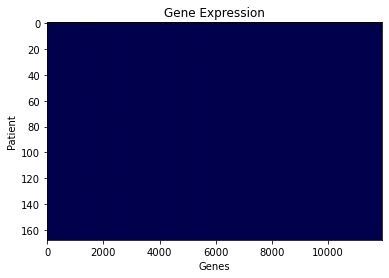

In [17]:
fig1 = plt.figure() 
ax = fig1.add_subplot(111) 
ax.imshow(plot_dataset, cmap = 'seismic') 
ax.set_title("Gene Expression") 
ax.set_ylabel('Patient') 
ax.set_xlabel('Genes') 
ax.set_aspect('auto') 
plt.show()

In [18]:
plot_dataset.to_numpy()

array([[ 5.14798599,  5.83937942,  7.16170348, ...,  0.31685902,
        14.94698926,  2.22911778],
       [ 4.06199052,  5.81476869, 10.1342648 , ...,  1.84474538,
        17.39322517,  0.6333044 ],
       [ 3.08466805,  4.91205125, 21.0940098 , ...,  0.14357965,
        20.30937828,  0.64234622],
       ...,
       [ 7.09595388,  6.92447232, 13.58758137, ..., 13.37435877,
        14.07941856,  3.87251599],
       [ 5.2839417 ,  6.8109267 ,  8.73746308, ...,  1.12422308,
        16.3940628 ,  2.89889534],
       [ 3.63005942,  6.38226407,  8.75035427, ...,  1.03037633,
        15.56384003,  1.36084857]])

# SVD calculation

In [19]:
u, s_in, v = np.linalg.svd(plot_dataset, full_matrices=True) 
s = np.zeros((plot_dataset.shape[0], plot_dataset.shape[1]))
s[:plot_dataset.shape[0], :plot_dataset.shape[0]] = np.diag(s_in)

In [20]:
print(plot_dataset.shape)
print(u.shape)
print(s.shape)
print(v.shape)

(168, 11939)
(168, 168)
(168, 11939)
(11939, 11939)


In [21]:
u

array([[-0.09417476,  0.02217056,  0.00391777, ...,  0.00796162,
        -0.01503206,  0.02201522],
       [-0.06224219,  0.00618356, -0.00060469, ...,  0.03301642,
        -0.01166199,  0.02748701],
       [-0.08222121,  0.08310437, -0.01202006, ..., -0.01974834,
        -0.01177558, -0.01965943],
       ...,
       [-0.04585996, -0.00498776,  0.02428105, ..., -0.02328143,
         0.01763548,  0.01851858],
       [-0.05566505, -0.03539831,  0.00251942, ...,  0.03145705,
         0.03257349, -0.02416215],
       [-0.04124813, -0.03738374, -0.00234456, ...,  0.05310899,
         0.01965502,  0.0070682 ]])

In [22]:
s

array([[230963.76995939,      0.        ,      0.        , ...,
             0.        ,      0.        ,      0.        ],
       [     0.        ,  56092.57787902,      0.        , ...,
             0.        ,      0.        ,      0.        ],
       [     0.        ,      0.        ,  39286.09324043, ...,
             0.        ,      0.        ,      0.        ],
       ...,
       [     0.        ,      0.        ,      0.        , ...,
             0.        ,      0.        ,      0.        ],
       [     0.        ,      0.        ,      0.        , ...,
             0.        ,      0.        ,      0.        ],
       [     0.        ,      0.        ,      0.        , ...,
             0.        ,      0.        ,      0.        ]])

In [23]:
v

array([[-2.91373710e-04, -3.83495342e-04, -4.60802173e-04, ...,
        -7.78612398e-05, -6.52912298e-04, -1.93064494e-04],
       [-3.52300454e-04, -5.79042411e-04, -1.41652581e-04, ...,
        -6.70345908e-05, -6.24388971e-04, -3.77925187e-04],
       [-1.15667106e-04, -7.65610313e-05, -6.92201358e-06, ...,
         1.50339307e-05,  2.14779107e-05,  2.26372336e-05],
       ...,
       [-1.35774804e-04, -1.44553306e-04,  2.32624915e-04, ...,
         9.99737499e-01,  7.46454289e-06, -7.92858825e-05],
       [-7.55840173e-04, -1.21960197e-03, -5.73817809e-04, ...,
         4.63801100e-06,  9.99558084e-01,  2.07299140e-05],
       [-3.91525201e-04,  1.66685312e-04,  4.17911002e-04, ...,
        -8.32445645e-05,  2.19517296e-05,  9.99376926e-01]])

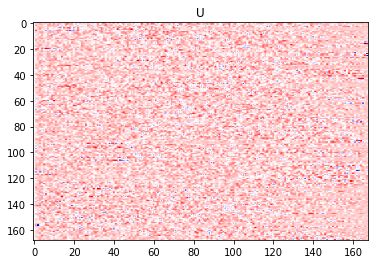

In [24]:
fig2 = plt.figure()
ax = fig2.add_subplot(111)
ax.imshow(u, cmap = 'seismic') 
ax.set_title("U")
ax.set_aspect('auto')
plt.show()

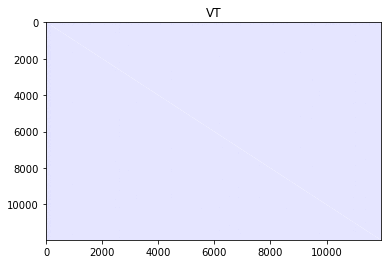

In [25]:
fig2 = plt.figure()
ax = fig2.add_subplot(111)
ax.imshow(v, cmap = 'seismic') 
ax.set_title("VT")
ax.set_aspect('auto')
plt.show()

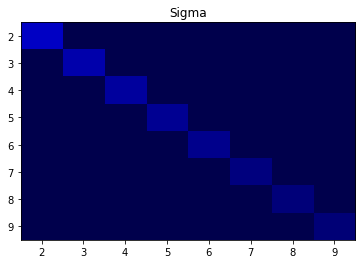

In [26]:
fig2 = plt.figure()
ax = fig2.add_subplot(111)
ax.imshow(s, cmap = 'seismic') 
ax.set_aspect('auto')
ax.set_title("Sigma")
ax.set_xlim ([1.5,9.5]) 
ax.set_ylim ([9.5,1.5]) 
plt.show()

# SVD Check

In [27]:
reconstructed = u@s@v
np.allclose(plot_dataset,reconstructed)

True

# Aalysis with the labels. 
## Male-Female pattern analysis

In [28]:
group_1 = label_dataset.index[label_dataset['gender']=='female'].tolist() 
group_2 = label_dataset.index[label_dataset['gender']=='male'].tolist() 
all_patients = set(range(0,label_dataset.shape[0]))

In [29]:
np.where(s_in == np.max(s_in))

(array([0], dtype=int64),)

# Statistical Analysis 
### The pattern is statistically analysed to find the p-value using two methods: 
#### 1. Mann-Whitney-Wilcoxin Test
#### 2. Hypergeometric Distribution 

#### Mann-Whitney-Wilcoxin Test 

In [30]:
# Start with the highest value of sigma

def findSignificantPatterns(group_1, group_2):
    sigma_max = s_in[0]

    # make a list to store significant patterns
    sig = list()

    # Loop through all patterns with a sigma value that is greater than 1/4 of the highest sigma value.
    i = 0;
    while s_in[i] > sigma_max * .10:
        # get the values for both groups
        group_1_values = u[group_1,i];
        group_2_values = u[group_2,i];
        i = i+1

        # run a mann-whitney-wilcoxin test to see if the groups are significantly differnt
        result = stats.mannwhitneyu(group_1_values, group_2_values)

        # if the groups aren't significant we don't care about them
        if result.pvalue > 0.05:
            continue

        # print the significant groups and store the patterns for later
        was_nt = "was" if result.pvalue < 0.05 else "wasn't"
        sig.append(i)
        print('For pattern ' + str(i) + ' in u the p-value was ' + str(result.pvalue) + " which " + was_nt + " significant.")
    return sig
sig = findSignificantPatterns(group_1, group_2)

For pattern 6 in u the p-value was 0.007364868179068456 which was significant.


#### Making box plot for the significant pattern

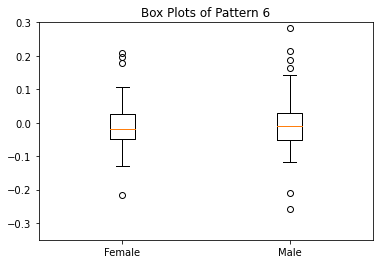

In [31]:
def boxPlotSigFigures(group_1, group_2, sig): 
    for pattern_to_plot in sig: 
        box_plot_fig, box_plot_ax = plt.subplots(); 
        box_plot_ax.set_title('Box Plots of Pattern ' + str(pattern_to_plot)); 
        box_data = [u[group_1, pattern_to_plot], u[group_2, pattern_to_plot]];
        box_plot_ax.boxplot(box_data, labels=['Female', 'Male']);
        box_plot_ax.set_ylim(-0.35,0.3) 
boxPlotSigFigures (group_1, group_2, sig)

#### Hypergeometric Distribution

In [32]:
def FindSignificantWithHyperGeometric(sig, group_1, threshold):
    for pattern_to_check in sig:
        # the threshold can be changed to the median, mean or the median + 1 stdev but it's all insignificant 
        # statistics.mean(u[:,pattern_to_check])+statistics.stdev(u[:,pattern_to_check])
        #0.00#(u[:,pattern_to_check]).sum()/len(u[:,pattern_to_check])

        # The convention in python for hypergeometric is that M = total number of objects, n is total number of type 1 objects,
        # N the total number of successes, and x the number of successes of type 1.
        # get total number above threshold
        N = (u[:,pattern_to_check] > threshold).sum()

        # get the total number of choices
        M = len(all_patients)

        # get the number of items in group 1
        n = len(group_1)

        # get the number of items in group 1 above the threshold
        x = (u[group_1, pattern_to_check] > threshold).sum()

        print(threshold, x, M, n, N)
        print("Pattern " + str(pattern_to_check) + ": p-value=" + str(1 - stats.hypergeom.cdf(x, M, n, N)))
FindSignificantWithHyperGeometric(sig, group_1, 0)

0 22 168 59 65
Pattern 6: p-value=0.5417448360195863


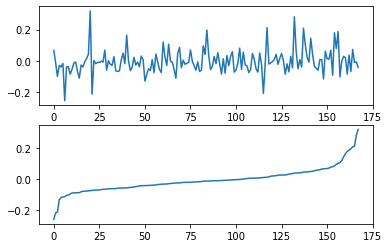

In [33]:
def plotSortedPattern(p):

    x = u[:,p].copy()
    figsort,axs = plt.subplots(2)


    axs[0].plot(x)
    x.sort()
    axs[1].plot(x)

    plt.show()
    
plotSortedPattern(6)

## Interpret the data

In [34]:
## pattern selection
patternToPrint = 1;

def printGeneExpression(patternToPrint):
    genes = list()
    expression = list()
    # make two lists with all of the protein names and the associated expression
    for i in range(0, len(plot_dataset.columns)):
        genes.append(plot_dataset.columns[i])
        expression.append(v[patternToPrint,:][i])
        #print(str(proteinToGene[data.columns[i]]) + ' ' + str(v[patternToPrint,:][i]))

    # turn the lists into a dataframe
    d = {'gene':genes, 'expression':expression}
    patternExpression = pd.DataFrame(d, columns=['gene','expression'])
    
    #We then sort the genes by the expression value
    pattern = patternExpression.sort_values(by=['expression'],ignore_index=True, ascending=False)
    gene_x = list()
    # We then print that list in order of expression so we can copy-paste into gorilla
    for gene in pattern.iloc[:,0]:
        gene_x.append(gene)
        print(gene)
    print(gene_x)
    import pandas
    gene_expression = pandas.DataFrame(data={"col1": gene_x})
    gene_expression.to_csv("./file.csv", sep=',',index=False)


printGeneExpression(6)

ENSG00000133048.11
ENSG00000198840.2
ENSG00000106153.12
ENSG00000198763.3
ENSG00000198899.2
ENSG00000198888.2
ENSG00000202198.1
ENSG00000274012.1
ENSG00000211459.2
ENSG00000198938.2
ENSG00000120885.18
ENSG00000198727.2
ENSG00000131095.10
ENSG00000132432.12
ENSG00000012223.11
ENSG00000197956.8
ENSG00000160307.8
ENSG00000204287.12
ENSG00000205542.9
ENSG00000228253.1
ENSG00000034510.5
ENSG00000198886.2
ENSG00000226958.1
ENSG00000202538.1
ENSG00000163453.10
ENSG00000248527.1
ENSG00000142534.5
ENSG00000225840.2
ENSG00000241781.2
ENSG00000146731.9
ENSG00000231500.5
ENSG00000125148.6
ENSG00000019582.13
ENSG00000280890.1
ENSG00000129103.16
ENSG00000173432.9
ENSG00000064886.12
ENSG00000239776.2
ENSG00000145425.8
ENSG00000099795.5
ENSG00000154978.11
ENSG00000244734.2
ENSG00000240583.9
ENSG00000188257.9
ENSG00000142089.14
ENSG00000126709.13
ENSG00000200795.1
ENSG00000146729.8
ENSG00000275530.1
ENSG00000146648.14
ENSG00000167552.12
ENSG00000124107.5
ENSG00000135404.10
ENSG00000142541.15
ENSG000002